In [1]:
from datasets.gastrointestinal import Gastrointestinal

In [2]:
from segment_anything import sam_model_registry

In [3]:
sam, img_embedding_size = sam_model_registry['vit_b'](image_size=1024,
                                                      num_classes=3,
                                                      checkpoint=r'D:\Side_project\SAMed\MedSAM\medsam_vit_b.pth')

In [4]:
low_res = img_embedding_size * 4

In [5]:
from torchvision import transforms
from datasets.gastrointestinal import RandomGenerator

db_train = Gastrointestinal(root_path=r'D:\Side_project\SAMed\data\map_1-1_gastrointestinal_coco\train',
                            anno_path=r'D:\Side_project\SAMed\data\map_1-1_gastrointestinal_coco\train\_annotations.coco.json',
                            split="train",
                            transform=transforms.Compose(
                                   [RandomGenerator(output_size=[1024, 1024], low_res=[low_res, low_res])])
                                   )

db_valid = Gastrointestinal(root_path=r'D:\Side_project\SAMed\data\map_1-1_gastrointestinal_coco\valid',
                            anno_path=r'D:\Side_project\SAMed\data\map_1-1_gastrointestinal_coco\valid\_annotations.coco.json',
                            split="valid",
                            transform=transforms.Compose(
                                   [RandomGenerator(output_size=[1024, 1024], low_res=[low_res, low_res], split='valid')])
                                   )

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [6]:
idx = 5

In [7]:
data = db_train[idx]

going transform


In [8]:
data['low_res_label'].shape

torch.Size([256, 256])

In [9]:
data['image'].dtype

torch.float32

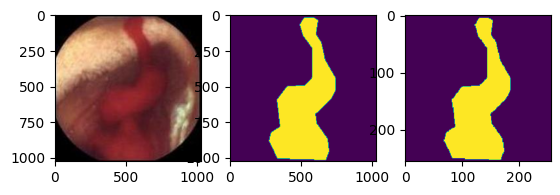

In [10]:
import matplotlib.pyplot as plt
import torch

plt.subplot(131)
plt.imshow(data['image'].permute(1,2,0))

plt.subplot(132)
plt.imshow(data['label'])

plt.subplot(133)
plt.imshow(data['low_res_label'])

In [11]:
idx = 5

In [12]:
data = db_valid[idx]

In [13]:
data['low_res_label'].shape

torch.Size([256, 256])

In [14]:
data['image'].dtype

torch.float32

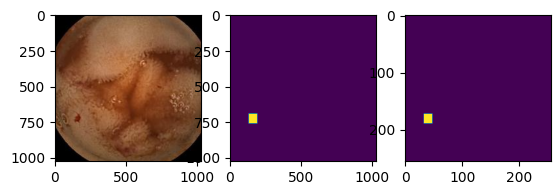

In [15]:
import matplotlib.pyplot as plt
import torch

plt.subplot(131)
plt.imshow(data['image'].permute(1,2,0))

plt.subplot(132)
plt.imshow(data['label'])

plt.subplot(133)
plt.imshow(data['low_res_label'])